### Logistic Regression Ilham Khefi Ramadhanu - 2213020120

## Read Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
databuah = pd.read_excel('Dataset Supervised/fruit.xlsx')
databuah

,diameter,weight,red,green,blue,name
0,2.96,86.76,172,85,2,orange
1,3.91,88.05,166,78,3,orange
2,4.42,95.17,156,81,2,orange
3,4.47,95.60,163,81,4,orange
4,4.48,95.76,161,72,9,orange
...,...,...,...,...,...,...
9995,15.35,253.89,149,77,20,grapefruit
9996,15.41,254.67,148,68,7,grapefruit
9997,15.59,256.50,168,82,20,grapefruit
9998,15.92,260.14,142,72,11,grapefruit


In [3]:
databuah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  10000 non-null  float64
 1   weight    10000 non-null  float64
 2   red       10000 non-null  int64  
 3   green     10000 non-null  int64  
 4   blue      10000 non-null  int64  
 5   name      10000 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [4]:
databuah.isnull().sum()

diameter    0
weight      0
red         0
green       0
blue        0
name        0
dtype: int64

In [5]:
databuah.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


## Label Encoder

In [6]:
from sklearn.preprocessing import LabelEncoder
labenc = LabelEncoder()
databuah['name'] = labenc.fit_transform(databuah['name'])
databuah

,diameter,weight,red,green,blue,name
0,2.96,86.76,172,85,2,1
1,3.91,88.05,166,78,3,1
2,4.42,95.17,156,81,2,1
3,4.47,95.60,163,81,4,1
4,4.48,95.76,161,72,9,1
...,...,...,...,...,...,...
9995,15.35,253.89,149,77,20,0
9996,15.41,254.67,148,68,7,0
9997,15.59,256.50,168,82,20,0
9998,15.92,260.14,142,72,11,0


In [7]:
databuah.corr()

,diameter,weight,red,green,blue,name
diameter,1.000000,0.999476,-0.217821,-0.396832,0.363307,-0.770768
weight,0.999476,1.000000,-0.214714,-0.392003,0.358916,-0.761567
red,-0.217821,-0.214714,1.000000,0.148937,-0.135900,0.286127
green,-0.396832,-0.392003,0.148937,1.000000,-0.242495,0.510564
blue,0.363307,0.358916,-0.135900,-0.242495,1.000000,-0.468832
name,-0.770768,-0.761567,0.286127,0.510564,-0.468832,1.000000


## Independent Dependent Variable

In [8]:
X = databuah.drop(columns='name')
X

,diameter,weight,red,green,blue
0,2.96,86.76,172,85,2
1,3.91,88.05,166,78,3
2,4.42,95.17,156,81,2
3,4.47,95.60,163,81,4
4,4.48,95.76,161,72,9
...,...,...,...,...,...
9995,15.35,253.89,149,77,20
9996,15.41,254.67,148,68,7
9997,15.59,256.50,168,82,20
9998,15.92,260.14,142,72,11


In [9]:
y = databuah['name']
y

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: name, Length: 10000, dtype: int32

## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-3.60195018, -3.02255396,  1.73997781,  0.76780981, -1.03337209],
       [-3.11420697, -2.978392  ,  1.16484825,  0.16992022, -0.92300682],
       [-2.85236589, -2.73464536,  0.20629897,  0.42615862, -1.03337209],
       ...,
       [ 2.88246734,  2.78833864,  1.3565581 ,  0.51157142,  0.95320276],
       [ 3.05189393,  2.91295068, -1.13567001, -0.34255657, -0.04008467],
       [ 3.32400329,  2.95985137, -0.17712073, -0.17173097, -1.03337209]])

## Split Train Test

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
len(databuah)

10000

In [13]:
len(X_train)

8000

In [14]:
len(X_test)

2000

## Training

In [15]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

## Testing

In [16]:
y_pred = log.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

## Model Evaluation

In [17]:
log.score(X_test, y_test)

0.9415

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi Logistic Regression : {:.2f}%".format(acc*100))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       988
           1       0.95      0.93      0.94      1012

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Akurasi Logistic Regression : 94.15%


In [19]:
confusion_matrix(y_test, y_pred)

array([[938,  50],
       [ 67, 945]], dtype=int64)

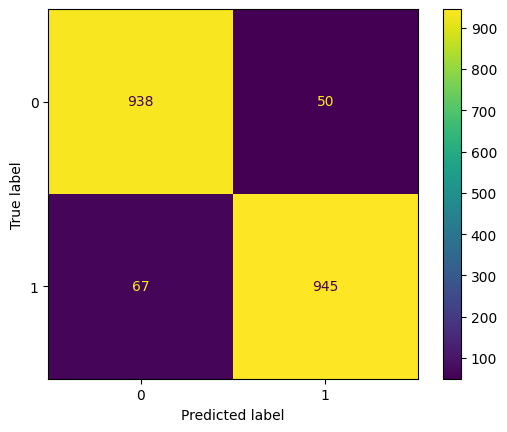

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## Test New Data

In [21]:
new_data = {
    'diameter' : [5],
    'weight' : [98],
    'red' : [20],
    'green' : [46],
    'blue' : [98]
}

new_data = pd.DataFrame(new_data)
new_data

,diameter,weight,red,green,blue
0,5,98,20,46,98


In [22]:
scaled_new_data = scaler.fit_transform(new_data)
new_prediction = log.predict(new_data)

decoded_label = labenc.inverse_transform([new_prediction[0]])
hasil = decoded_label[0]
print('Hasil Prediksi = {}'.format(hasil))

Hasil Prediksi = orange


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [23]:
for i in range(len(y.unique())):
    decoded_label = labenc.inverse_transform([i])
    print("{} = {}".format(i, decoded_label[0]))

0 = grapefruit
1 = orange


# ======================================================================================================================================

## Export Model

In [24]:
import pickle
with open('Model/logistic_fruit.pickle', 'wb') as r:
    pickle.dump(log, r)